# SVM (Support Vector Machines) to build and train a model

In [1]:
# Installing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using the Universal Bank records

In [3]:
# https://drive.google.com/file/d/1Vn9Tb0UjtBeyZtzqllK6EtLLe2yu3jPg/view?usp=sharing

file_id = '1Vn9Tb0UjtBeyZtzqllK6EtLLe2yu3jPg'
link = f'https://drive.google.com/uc?id={file_id}'
unibank = pd.read_csv(link)
unibank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0.0,0.0,0.0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85.0,0.0,0.0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0.0,0.0,0.0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0.0,0.0,0.0,0,1,0


Checking and Fixing null values

In [5]:
# Checking for null values
unibank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              2
Personal Loan         1
Securities Account    1
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
unibank['Mortgage'].fillna(int(unibank['Mortgage'].mean()), inplace=True)
unibank['Personal Loan'].fillna(int(unibank['Personal Loan'].mean()), inplace=True)
unibank['Securities Account'].fillna(int(unibank['Securities Account'].mean()), inplace=True)

In [7]:
unibank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Dropping the ID and Zip Code data
bank = unibank.drop(["ID","ZIP Code"], axis = 1)
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0.0,1.0,0,0,0
1,45,19,34,3,1.5,1,0.0,0.0,1.0,0,0,0
2,39,15,11,1,1.0,1,0.0,0.0,0.0,0,0,0
3,35,9,100,1,2.7,2,0.0,0.0,0.0,0,0,0
4,35,8,45,4,1.0,2,0.0,0.0,0.0,0,0,1


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

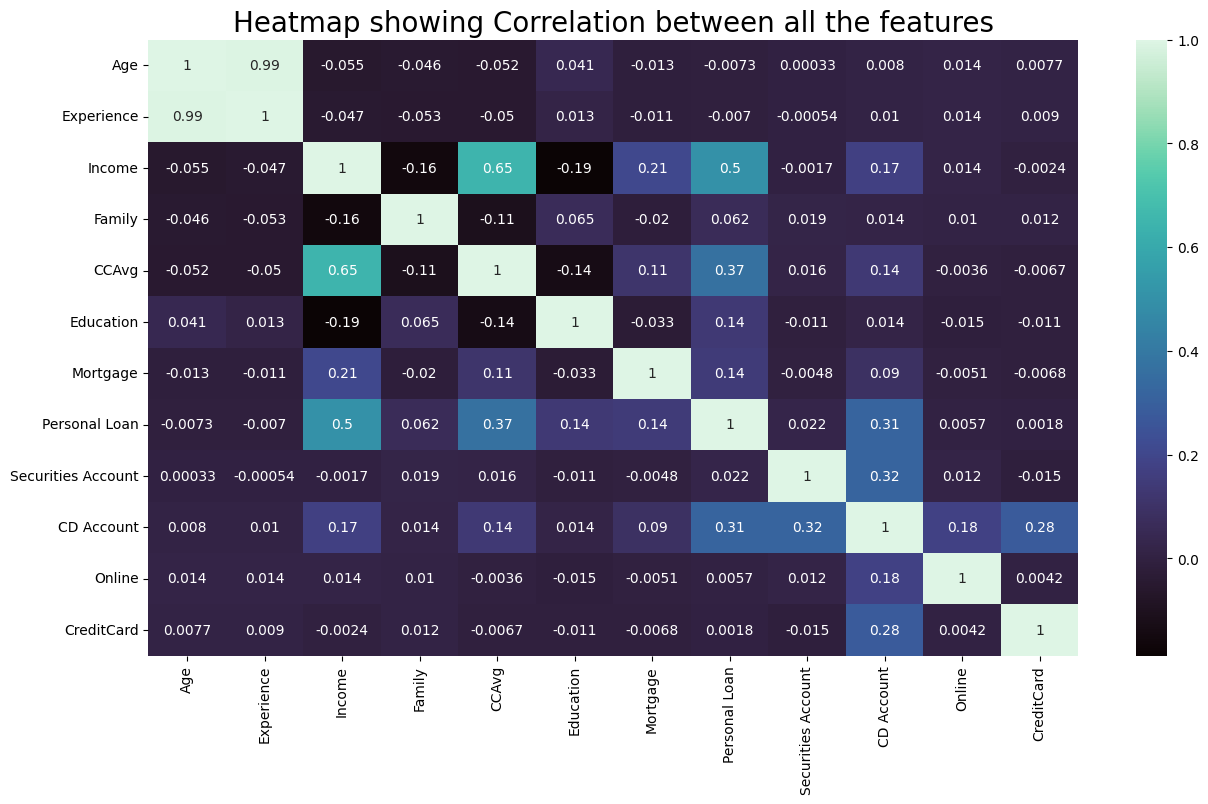

In [10]:
# Heatmap
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(bank.corr(),annot = True, cmap='mako')

Separating the class 0 and class 1 CreditCard data

In [11]:
zero_class = bank[bank.CreditCard==0]
zero_class.shape

(3530, 12)

In [12]:
one_class = bank[bank.CreditCard==1]
one_class.shape

(1470, 12)

Scatter Plot

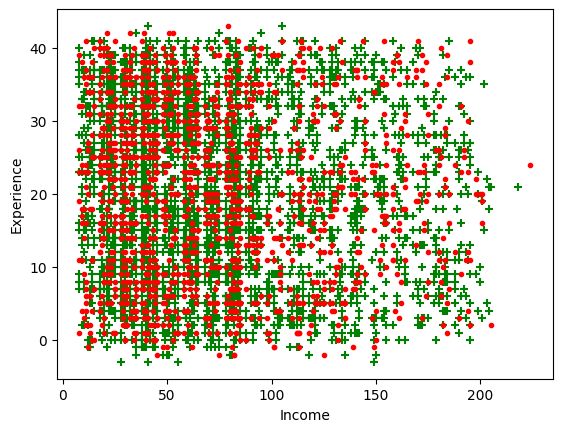

In [13]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='.')

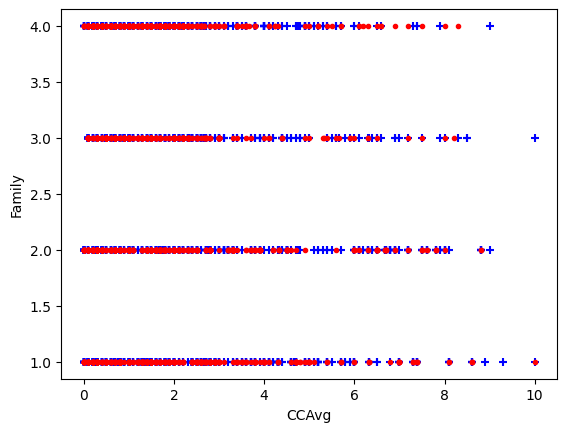

In [14]:
# CCAvg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='.')

Scaling the Data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(bank.drop('CreditCard',axis=1)).transform(bank.drop('CreditCard',axis=1))
bank_scaled = pd.DataFrame(scaled, columns=bank.columns[:-1])
bank_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555272,-0.3255,2.932052,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555272,-0.3255,2.932052,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555272,-0.3255,-0.341058,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555272,-0.3255,-0.341058,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555272,-0.3255,-0.341058,-0.25354,-1.216618


In [16]:
# Splitting the columns in to dependent (x) and independent (y) variables
x = bank_scaled
y = bank['CreditCard']

**Implementing SVM**

In [17]:
# Split data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svcmodel=SVC()
svcmodel.fit(x_train, y_train)
y_pred=svcmodel.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


In [20]:
# Save the model
import pickle
pickle.dump(svcmodel, open('svcmodel.pkl','wb'))